In [16]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        # X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5, 3.0], random_state=random_state)
        X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X

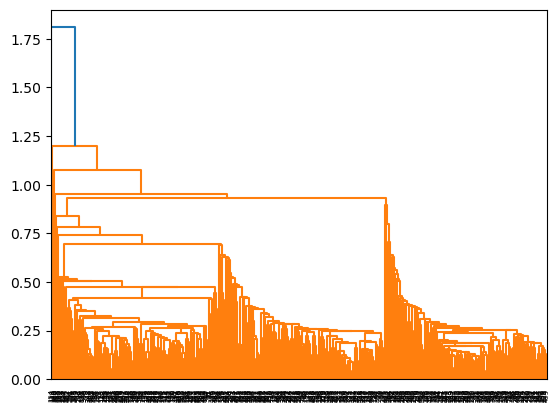

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = generate_data(500,1)
K = 3

model = KMeans(n_clusters=K, n_init=20, max_iter=10)
model.fit(data)

centers = model.cluster_centers_
labels = model.labels_

temp = linkage(data, 'single')

dend = dendrogram(temp)
import plotly.figure_factory as ff
fig = ff.create_dendrogram(data, color_threshold=1.5)
fig.update_layout(width=800, height=500)
